In [1]:
import yfinance as yf
import pandas as pd

# Definir el ticker
ticker = "NVDA"

# Descargar datos históricos
nvda = yf.download(ticker, start="2010-01-01", end="2025-10-16", interval="1d")

# Ver las primeras filas
print(nvda.head())

# Opcional: seleccionar solo la columna de cierre ajustado
y = nvda['Close']

C:\Users\hecto\AppData\Local\Temp\ipykernel_18356\47055986.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda = yf.download(ticker, start="2010-01-01", end="2025-10-16", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2010-01-04  0.423830  0.426810  0.415120  0.424289  800204000
2010-01-05  0.430019  0.434604  0.422226  0.422226  728648000
2010-01-06  0.432770  0.433687  0.425664  0.429790  649168000
2010-01-07  0.424289  0.432312  0.421080  0.430478  547792000
2010-01-08  0.425206  0.428186  0.418329  0.420850  478168000


In [2]:
indi = yf.download("INDI", start="2020-01-01", end="2025-10-16")

C:\Users\hecto\AppData\Local\Temp\ipykernel_18356\1527083094.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  indi = yf.download("INDI", start="2020-01-01", end="2025-10-16")
[*********************100%***********************]  1 of 1 completed


In [3]:
exog = indi['Close']

In [4]:
# Alinear fechas
data = pd.concat([y, exog], axis=1).dropna()
y = data.iloc[:, 0]
exog = data.iloc[:, 1]

In [5]:
data

Ticker,NVDA,INDI
Date,,
2020-01-02,5.971410,9.90
2020-01-03,5.875831,9.90
2020-01-06,5.900474,9.92
2020-01-07,5.971909,9.93
2020-01-08,5.983109,9.96
...,...,...
2025-10-09,192.570007,4.44
2025-10-10,183.160004,4.15
2025-10-13,188.320007,4.69


In [6]:
data.index = pd.to_datetime(data.index)

In [7]:
import plotly.express as px
import plotly.graph_objects as go

In [8]:
# Gráfica de NVDA (endógena)
fig1 = px.line(data, y="NVDA", title="Close Price NVDA")
fig1.update_layout(xaxis_title="Year", yaxis_title="Close Price")
fig1.show()

# Gráfica de INDI (exógena)
fig2 = px.line(data, y="INDI", title="Close Price INDI")
fig2.update_layout(xaxis_title="Year", yaxis_title="Close Price")
fig2.show()

In [9]:
# Últimos 30 días para test
train = data.iloc[:-30]
test  = data.iloc[-30:]

y_train = train["NVDA"]
X_train = train[["INDI"]]

y_test = test["NVDA"]
X_test = test[["INDI"]]

In [10]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series, title=''):
    print(f'ADF Test: {title}')
    result = adfuller(series.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('\n')

def kpss_test(series, title=''):
    print(f'KPSS Test: {title}')
    result = kpss(series.dropna(), regression='c')
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))
    print('\n')

adf_test(y_train, title='NVDA (y_train)')
kpss_test(y_train, title='NVDA (y_train)')

adf_test(X_train['INDI'], title='INDI (X_train)')
kpss_test(X_train['INDI'], title='INDI (X_train)')

ADF Test: NVDA (y_train)
ADF Statistic: 0.663135
p-value: 0.989073
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


KPSS Test: NVDA (y_train)
KPSS Statistic: 4.431043
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


ADF Test: INDI (X_train)
ADF Statistic: -1.791905
p-value: 0.384488
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


KPSS Test: INDI (X_train)
KPSS Statistic: 4.070468
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739




C:\Users\hecto\AppData\Local\Temp\ipykernel_18356\3650669362.py:15: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\hecto\AppData\Local\Temp\ipykernel_18356\3650669362.py:15: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




- kpss -> H0: stationary
- ADF -> H0: non stationary

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

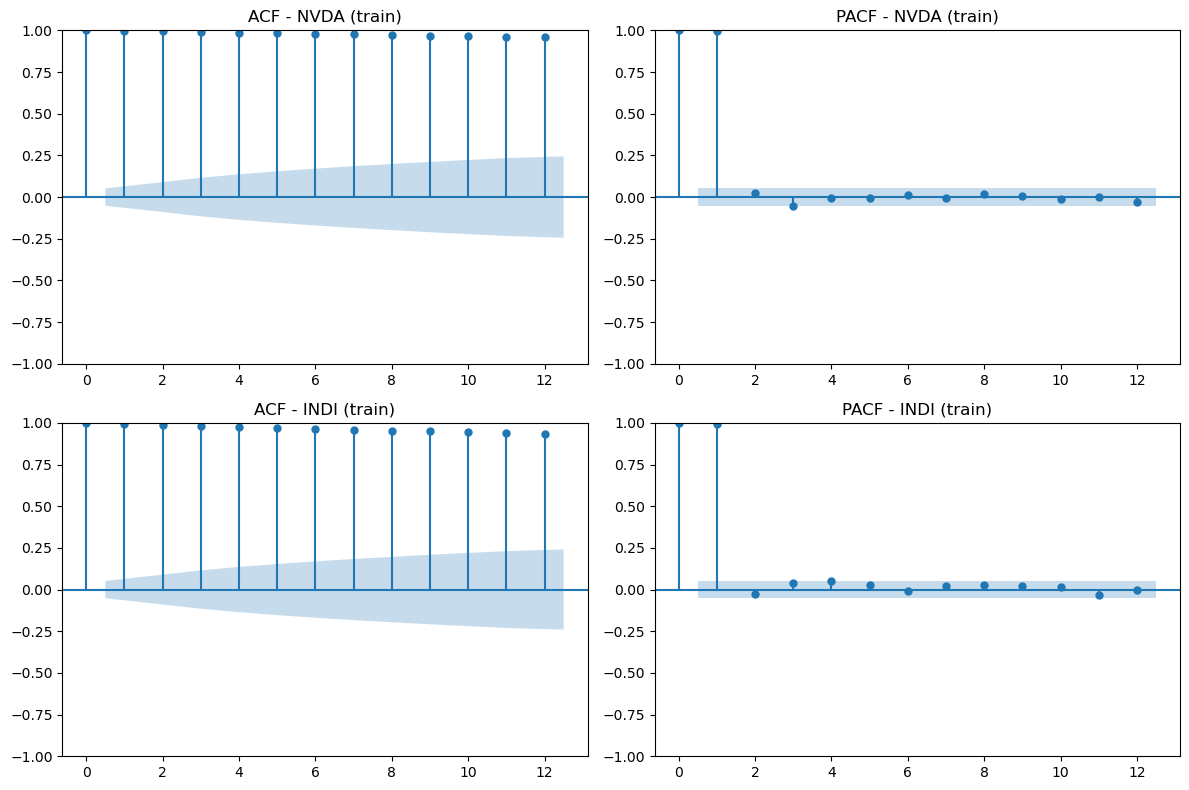

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
# ACF Inflation
plot_acf(y_train.dropna(), lags=12, ax=axes[0,0])
axes[0,0].set_title("ACF - NVDA (train)")

# PACF Inflation
plot_pacf(y_train.dropna(), lags=12, ax=axes[0,1], method="ywm")
axes[0,1].set_title("PACF - NVDA (train)")

# ACF FX
plot_acf(X_train["INDI"].dropna(), lags=12, ax=axes[1,0])
axes[1,0].set_title("ACF - INDI (train)")

# PACF FX
plot_pacf(X_train["INDI"].dropna(), lags=12, ax=axes[1,1], method="ywm")
axes[1,1].set_title("PACF - INDI (train)")

plt.tight_layout()
plt.show()

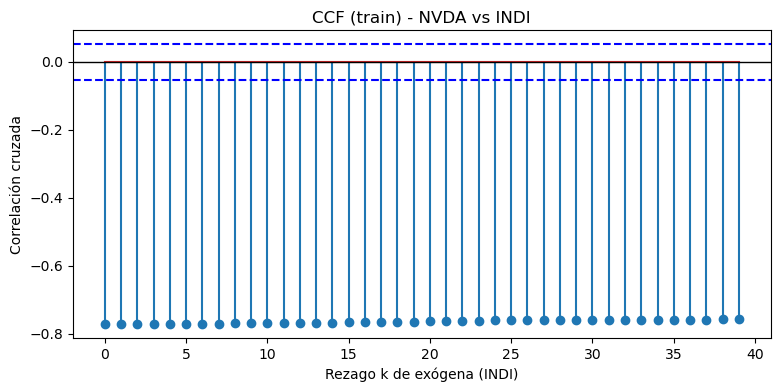

In [13]:
from statsmodels.tsa.stattools import ccf

import matplotlib.pyplot as plt
import numpy as np


# Calcular CCF (inflation vs fx)
ccf_vals = ccf(y_train, X_train, adjusted=False)

# Número de rezagos a mostrar
max_lags = min(40, len(ccf_vals))

# Graficar CCF porque no hay función en statsmodels
plt.figure(figsize=(9,4))
plt.stem(range(max_lags), ccf_vals[:max_lags])
plt.axhline(0, color="black", linewidth=1)
plt.axhline(1.96/np.sqrt(len(y_train)), color="blue", linestyle="--")   # umbral superior 95%
plt.axhline(-1.96/np.sqrt(len(y_train)), color="blue", linestyle="--")  # umbral inferior 95%
plt.title("CCF (train) - NVDA vs INDI")
plt.xlabel("Rezago k de exógena (INDI)")
plt.ylabel("Correlación cruzada")
plt.show()

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
model = SARIMAX(
    y_train, exog=X_train[["INDI"]],
    order=(1,1,2), seasonal_order=(1,1,1,15), trend="c",
    enforce_stationarity=False, enforce_invertibility=False
)
fit = model.fit(disp=False, maxiter=1000, random_seed=42)
print(fit.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: random_seed. After release 0.14, this will raise.



                                      SARIMAX Results                                       
Dep. Variable:                                 NVDA   No. Observations:                 1425
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 15)   Log Likelihood               -3053.295
Date:                              Fri, 17 Oct 2025   AIC                           6122.591
Time:                                      17:10:58   BIC                           6164.493
Sample:                                           0   HQIC                          6138.260
                                             - 1425                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0058      0.004      1.662      0.097      -0.001       0.013
INDI           1.29

In [16]:
import plotly.graph_objects as go


fc_test = fit.get_forecast(steps=len(X_test), exog=X_test[["INDI"]])
mean_test = fc_test.predicted_mean
conf_int = fc_test.conf_int()

# Alinear índices correctamente
mean_test.index = y_test.index
conf_int.index = y_test.index


fig = go.Figure()

# Train actuals
fig.add_trace(go.Scatter(
    x=y_train.index, y=y_train,
    mode="lines+markers", name="Train"
))

# Test actuals
fig.add_trace(go.Scatter(
    x=y_test.index, y=y_test,
    mode="lines+markers", name="Real Test", line=dict(color="green")
))

# Predictions for test
fig.add_trace(go.Scatter(
    x=mean_test.index, y=mean_test,
    mode="lines+markers", name="Forecast (Test)", line=dict(color="orange")
))

# Confidence intervals (95%)
fig.add_trace(go.Scatter(
    x=conf_int.index, y=conf_int.iloc[:, 0],
    line=dict(color="lightgrey"), showlegend=False
))
fig.add_trace(go.Scatter(
    x=conf_int.index, y=conf_int.iloc[:, 1],
    fill="tonexty", line=dict(color="lightgrey"),
    name="95% Confidence Interval"
))

# Layout
fig.update_layout(
    title="SARIMAX Forecast vs Test Data",
    xaxis_title="Time",
    yaxis_title="NVDA"
)

fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

